# Young experiment with wave trains

### Consideraciones iniciales

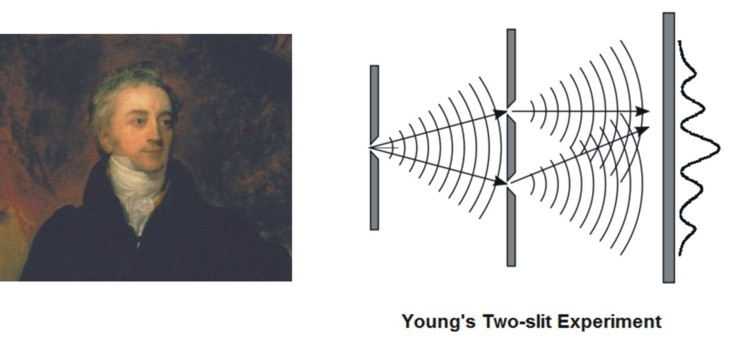

In [3]:
from IPython.display import Image
Image(filename="YoungTwoSlitExperiment.JPG")

When we studied Young's experiment, we assumed that we illuminated with monochromatic radiation. In this case, the position of the maximum and minimum irradiance were given by,

<div class = "alert alert-error">
Irradiance maximums. $ \delta = 2 m \pi \implies \frac {a x} {D} = m \implies $

$$ x_ {max} = \frac {m \lambda D} {a} $$
</div>
<div class = "alert alert-error">
Irradiance minima $ \delta = (2 m + 1) \pi \implies \frac {a x} {D} = (m +1/2) \implies $

$$ x_{min} = \frac {(m + 1/2) \lambda D} {a} $$
</div>

As we see in the previous formulas, the position of the maximum and minimum depends on the wavelength $ \lambda $. When we illuminate the same experiment with non-monochromatic radiation, we can consider that each wavelength that makes up the radiation spectrum forms its pattern of interference. But each pattern of interference will have the maximums in slightly different positions. This will lead to a reduction of the constrast and finally, to the disappearance of the interference fringes. We will study this process in more detail, first seeing a better approximation than a monochromatic wave to the radiation emitted by the real light sources, and later, how this type of radiation affects the interferences in a Young experiment.

When we studied Young's experiment, we assumed that we illuminated with monochromatic radiation. In this case, the position of the maximum and minimum irradiance were given by,

<div class="alert alert-error">
Máximos de irradiancia.  $\delta = 2 m \pi \implies \frac{a x}{D} = m \implies$

$$x_{max} = \frac{m \lambda D}{a}$$
</div>
<div class="alert alert-error">
Mínimos de irradiancia.  $\delta = (2 m + 1)\pi \implies \frac{a x}{D} = (m +1/2) \implies$

$$x_{min} = \frac{(m + 1/2) \lambda D}{a}$$
</div>

As we see in the previous formulas, the position of the maximum and minimum depends on the wavelength $ \lambda $. When we illuminate the same experiment with non-monochromatic radiation, we can consider that each wavelength that makes up the radiation spectrum forms its pattern of interference. But each pattern of interference will have the maximums in slightly different positions. This will lead to a reduction of the constrict and finally, to the disappearance of the interference fringes. We will study this process in more detail, first seeing a better approximation than a monochromatic wave to the radiation emitted by the real light sources, and later, how this type of radiation affects the interferences in a Young experiment.

### Wave trains

Although the abstraction of treating a monochromatic wave is extremely useful, real light sources do not emit such radiation. The reason is simple: a pure monochromatic wave (that is, a sine or a cosine) has neither beginning nor end, so to emit a wave of this type would require infinite energy.

The closest we can get to a monochromatic wave is a succession of trains of harmonic waves separated from each other by random jumps in the phase of the wave.

The following code shows an example of this type of wave trains.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('fivethirtyeight')
#import ipywidgets as widg
#from IPython.display import display

#####
#PARAMETERS THAT CAN BE MODIFIED
#####
Lambda = 5e-7
c0 = 3e8
omega = 2*np.pi*c0/Lambda
T = 2*np.pi/omega
tau = 2*T
###########


time = np.linspace(0,18*T,600)

def field(t,w,tau0):
    numsteps = (int)(np.floor(t[-1]/tau0))
    phi = (np.random.random(numsteps)-0.5)*4*np.pi
    phi_aux = np.array([np.ones(np.size(t)/numsteps)*phi[i] for i in range(numsteps)])
    phi_t = np.reshape(phi_aux,np.shape(phi_aux)[0]*np.shape(phi_aux)[1])
    phi_t = np.pad(phi_t,(np.size(t)-np.size(phi_t),0),mode='edge')
    e1 = np.cos(omega*t + phi_t)
    fig,ax = plt.subplots(1,1,figsize=(8,4))
    ax.plot(t,e1)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Field (u.a.)')
    return None

field(time,omega,tau)

TypeError: 'float' object cannot be interpreted as an integer

### Spectral Width

A train of waves ceases to be a completely monochromatic radiation, that is, with a single wavelength or frequency, passing to have a certain spectral width. We can understand it by observing that a wave train ceases to be a cosine or a sine due to these random phase jumps, having a more complex temporal evolution.

The width in frequencies (or wavelengths) of a wave train can be found by means of the Fourier transform. This analysis is outside the object of this course but you will find a result that emerges from this transformation useful: the relationship between spectral width (range of frequencies present in the radiation $ \Delta \nu $) and coherence time. This relationship is,

$$ t_c \simeq \frac {1} {\Delta \nu} $$

Considering that $ \nu = c / \lambda $ we can obtain the relation between the coherence length and the spectral width expressed in wavelengths,

$$ l_c \simeq \frac {\lambda ^ 2} {\Delta \lambda} $$

The previous relationship tells us that the greater the coherence length, the smaller the spectral width of the radiation, or what is the same, the more monochromatic it will be.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('fivethirtyeight')
import ipywidgets as widg
from IPython.display import display

#####
#PARAMETERS THAT CAN BE MODIFIED
#####
Lambda = 5e-7
c0 = 3e8
omega = 2*np.pi*c0/Lambda
T = 2*np.pi/omega
time = np.linspace(0,30*T,1500)
tau = 2*T
###########
def fieldfft(t,w,tau0):
    numsteps = (int)(np.floor(t[-1]/tau0))
    phi = (np.random.random(numsteps)-0.5)*4*np.pi
    phi_aux = np.array([np.ones(np.size(t)/numsteps)*phi[i] for i in range(numsteps)])
    phi_t = np.reshape(phi_aux,np.shape(phi_aux)[0]*np.shape(phi_aux)[1])
    phi_t = np.pad(phi_t,(np.size(t)-np.size(phi_t),0),mode='edge')
    e1 = np.cos(omega*t + phi_t)
    fig1,ax1 = plt.subplots(1,2,figsize=(10,4))
    ax1[0].plot(t,e1)
    ax1[0].set_title('Campo')
    ax1[0].set_xlabel('tiempo (s)')
    ax1[1].set_ylabel('E(t)')
    freq = np.fft.fftfreq(t.shape[0],t[1]-t[0])
    e1fft = np.fft.fft(e1)
    ax1[1].plot(freq,np.abs(e1fft)**2)
    ax1[1].set_xlim(0,0.1e16)
    ax1[1].set_title('Espectro del field')
    ax1[1].vlines(omega/(2*np.pi),0,np.max(np.abs(e1fft)**2),'k')
    return 

fieldfft(time,omega,tau)


TypeError: 'float' object cannot be interpreted as an integer

### What happens if we illuminate Young's experiment with this type of radiation?

If we illuminate a double slit with a train of waves like the one represented above, we will have two waves arriving at a certain point on the screen with the same temporal evolution but one of them delayed with respect to the other. This is due to the optical path difference traveled by each wave train.

When we superimpose both trains (one with a certain delay with respect to the other), the difference between the initial phases of each wave will depend on the time. Furthermore, since the phase jumps in the wave train are random, that phase difference will change in turn randomly. The following code shows this difference.

This random difference has a large effect on the total irradiance of the interference pattern.

Recall that the total intensity is given by:

$$ I_t = I_1 + I_2 + \epsilon_0 c n <E_1 E_2> _ {\tau} $$

In the previous expression we have explicitly left in the interferential term the average over the scalar product of the interfering fields. This scalar product gives rise to,

$$ \int_0 ^ \tau \cos (k_1 r - \omega t + \phi_1) \cos (k_2 r - \omega t + \phi_2) dt $$

that we can write based on the difference of initial phases $ \phi_1 - \phi_2 $. If this difference varies randomly during the time interval $ \tau $, its average will be null and the interferential term will also be zero. Therefore the total irradiance will be,

$$ I_t = I_1 + I_2 $$

That is, the interference stripes are lost. This situation will occur when the path difference is sufficient so that the zones of the wave trains that interfere with the same phase do not overlap. From the center of the screen (phase difference equal to zero between the waves that interfere) we will see then how the stripes are gradually lost as we move away to external points (the contrast decreases progressively) until they are completely lost (contrast equal to zero). At this point, the total irradiance will simply be the sum of the irradiances of the interfering beams.

The point at which the fringes are completely lost will be, as has been said, the one that ensures that there is no overlap between the zones of the wave trains with the same phase. That is, the path difference must be greater than the characteristic distance of each of these zones. This distance is simply the length of coherence. Therefore, we will lose the interference if,

$$ \Delta> l_c $$

where $ \Delta $ denotes the path difference between the beams.

The following code shows the interference pattern when we illuminate Young's experiment with a wave train.

interstripe 0.5833333333333333 (mm)
longitud de coherencia 2.5 (um)


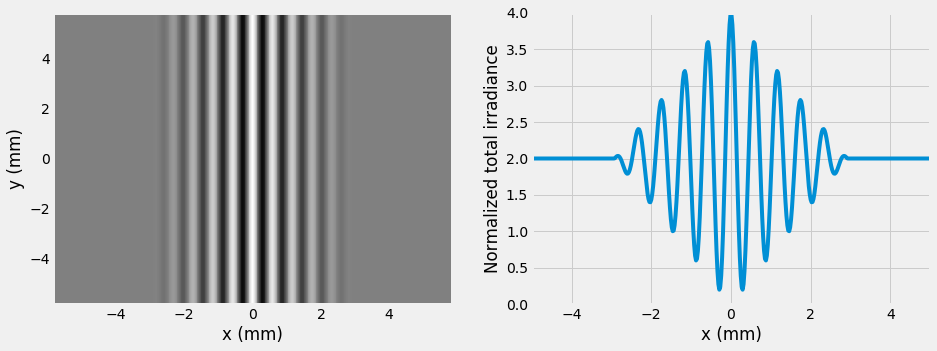

In [4]:
from matplotlib.pyplot import *
from numpy import *
%matplotlib inline
style.use('fivethirtyeight')

#####
#PARAMETERS THAT CAN BE MODIFIED
#####
Lambda = 5e-7 # lradiation wavelength 500 nm
k = 2.0*pi/Lambda
D = 3.5# in meters
a = 0.003 # source separation 3 mm
DeltaLambda = 10e-8 # spectral width
###########

lc = (Lambda**2)/DeltaLambda
interstripe = Lambda*D/a
print ("interstripe",interstripe*1e3, "(mm)") # muestra el valor de la interstripe en mm
print( "longitud de coherencia", lc*1e6, "(um)") #muestra el valor de la long. de coherencia en um

x = linspace(-10*interstripe,10*interstripe,500)
I1 = 1 # We consider normalized irradiances at a certain value.
I2 = 1

X,Y = meshgrid(x,x)
Delta = a*X/D
delta = k*Delta

gamma12 = (1 - np.abs(Delta)/lc)*(np.abs(Delta)<lc)
Itotal = I1 + I2 + 2.0*sqrt(I1*I2)*gamma12*cos(delta)

figure(figsize=(14,5))
subplot(121)
pcolormesh(x*1e3,x*1e3,Itotal,cmap = 'gray',vmin=0,vmax=4)
xlabel("x (mm)")
ylabel("y (mm)")
subplot(122)
plot(x*1e3,Itotal[(int)(x.shape[0]/2),:])
xlim(-5,5)
ylim(0,4)
xlabel("x (mm)")
ylabel("Normalized total irradiance");